In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 

fontsize = 18

### Plot training and validation 

In [7]:
def ax_plot(df,ax):    
    df_mean = df.groupby(['Num Qubits', 'Time','Step','Ops Index']).agg(
                            Average_Train_Accuracy=('Training Accuracy', 'mean'),
                            Average_Val_Accuracy=('Validation Accuracy', 'mean')).reset_index()


    df_plot_train = df_mean.set_index(['Time', 'Step', 'Ops Index'])['Average_Train_Accuracy'].unstack()
    df_plot_val   = df_mean.set_index(['Time', 'Step', 'Ops Index'])['Average_Val_Accuracy'].unstack()


    # Plotting df
    for column in df_plot_train.columns:
        color = 'royalblue' if column == 0 else 'darkorange' if column == 1 else 'forestgreen'
        ax.plot([str(i) for i in df_plot_train.index], df_plot_train[column], marker='^',color =color, label=f'Train - {column}')
        # ax.plot([str(i) for i in df_plot_train.index], df_plot_train[column], marker='^', label=f'Train - {column}')

    # Plotting df2
    for column in df_plot_val.columns:
        color = 'royalblue' if column == 0 else 'darkorange' if column == 1 else 'forestgreen'
        ax.plot([str(i) for i in df_plot_val.index], df_plot_val[column], linestyle='--',color=color, marker='o',label=f'Val - {column}')


    ax.tick_params(axis='x', rotation=90)

    # ax.set_ylim(0.6,1)
    # ax.grid()

In [8]:
hemo1_wide_range = pd.read_csv('./result/hemo1_wide_range.csv')
hemo1_fine_search = pd.read_csv('./result/hemo1_fine_search.csv')
hemo2_wide_range = pd.read_csv('./result/hemo2_wide_range.csv')
hemo2_fine_search = pd.read_csv('./result/hemo2_fine_search.csv')
hemo3_wide_range = pd.read_csv('./result/hemo3_wide_range.csv')
hemo3_fine_search = pd.read_csv('./result/hemo3_fine_search.csv')

df = [hemo1_wide_range,hemo2_wide_range,hemo3_wide_range,hemo1_fine_search,hemo2_fine_search,hemo3_fine_search]
new_df = []
for d in df:
    dd = d[d['Step'] != 1]
    new_df.append(dd)

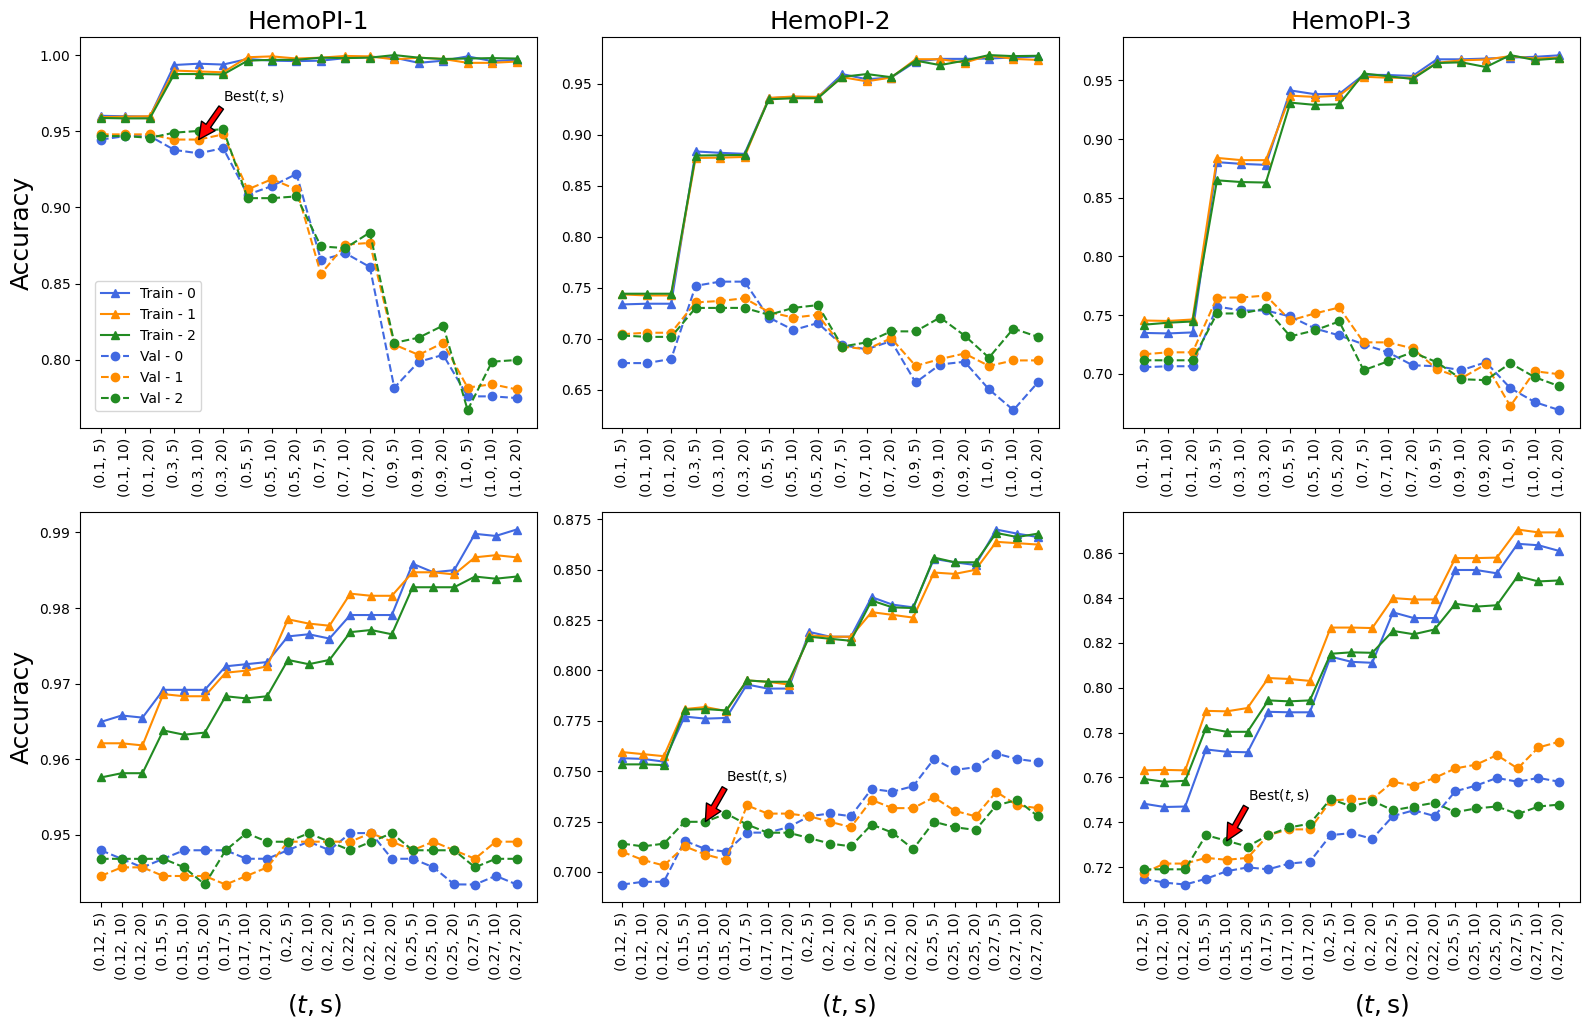

In [10]:
df = [hemo1_wide_range,hemo2_wide_range,hemo3_wide_range,hemo1_fine_search,hemo2_fine_search,hemo3_fine_search]
df_name = ['HemoPI-1','HemoPI-2','HemoPI-3']
row_name = ['Accuracy','Accuracy']
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(16,10))  

for ax, name in zip(axs[0], df_name):
    ax.set_title(name,size=fontsize)

for ax, row in zip(axs[:,0], row_name):
    ax.set_ylabel(row, rotation=90, size=fontsize)

for ax,data in zip(axs.flatten(),new_df):
    ax_plot(data,ax)
x_labels = r'($t , $s)'

for i in range(3):
    fig.text((i+0.60)/3, -0.01, x_labels, ha='center', va='center',fontsize=fontsize)

axs[0,0].annotate('Best'+r'($t , $s)', xy=(4,0.944536 ), xytext=(5, 0.97),
            arrowprops=dict(facecolor='red', shrink=1))

axs[1, 1].annotate('Best'+r'($t , $s)', xy=(4,0.725 ), xytext=(5, 0.745),
            arrowprops=dict(facecolor='red', shrink=1))

axs[1, 2].annotate('Best'+r'($t , $s)', xy=(4,0.731735 ), xytext=(5, 0.75),
            arrowprops=dict(facecolor='red', shrink=1))

handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.06,0.60)) 

plt.tight_layout()  
plt.savefig('./plots/hemo_grid_search.pdf',bbox_inches="tight")
plt.show()


----------------------------------------
### Train/Val/Test on 30 sets of Pauli Strings with classical best kernel 

In [11]:
hemo1_30sets = pd.read_csv('./result/hemo1_30sets_mean.csv')
hemo2_30sets = pd.read_csv('./result/hemo2_30sets_mean.csv')
hemo3_30sets = pd.read_csv('./result/hemo3_30sets_mean.csv')

In [12]:
def sets_plot(df,ax,csvm):
    ax.plot(df['Ops Index'],df['Average_Train_Accuracy'], color='blue',linestyle='--', marker='o',label='Train')
    ax.plot(df['Ops Index'],df['Average_Val_Accuracy'], color='green',linestyle='--', marker='^',label='Validation')
    ax.plot(df['Ops Index'],df['Test_Accuracy'], color='red', marker='D',label='Test')
    ax.axhline(y=csvm, color='black', linestyle='-',label='Classical Test',linewidth=2)

    ax.set_xticks(df['Ops Index'],df['Ops Index'])
    ax.set_xticklabels(df['Ops Index'],rotation=90)
    ax.tick_params()

    ax.set_ylim(0.65,1)


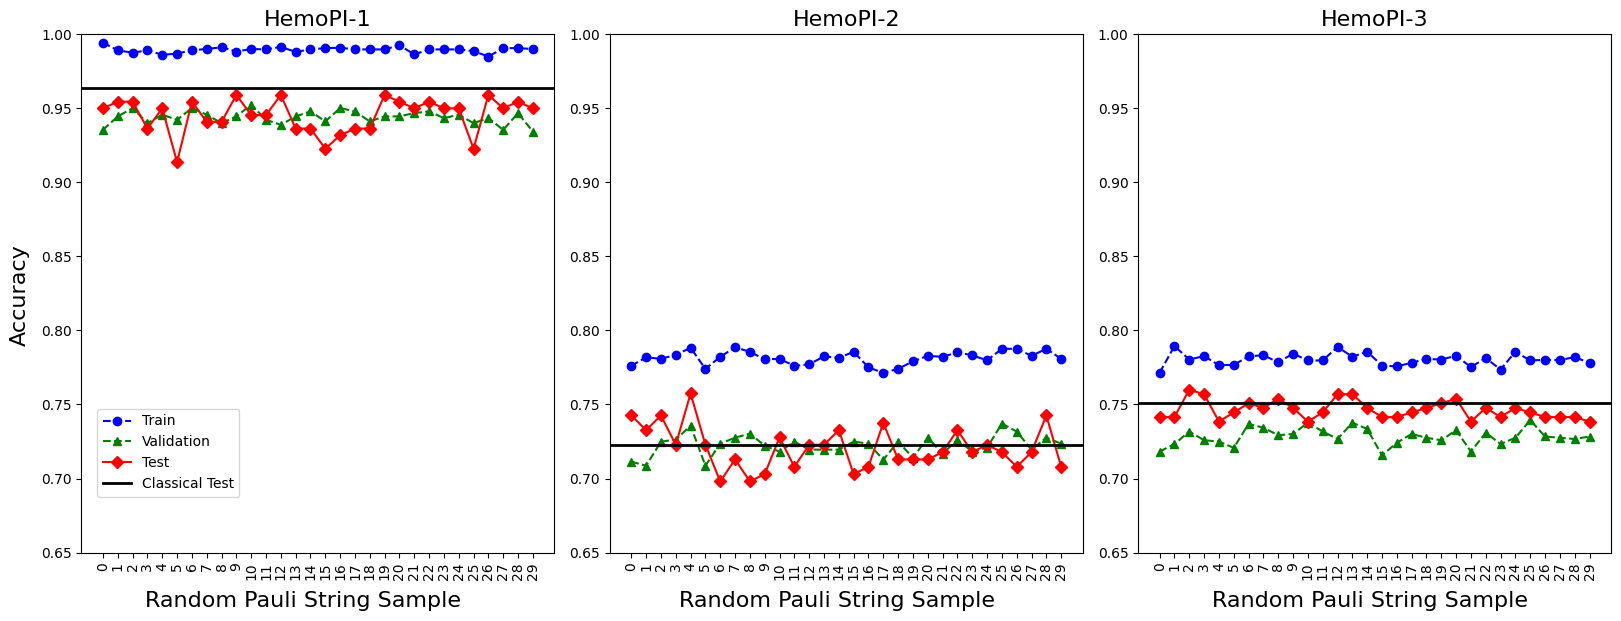

In [13]:
df_30set = [hemo1_30sets,hemo2_30sets,hemo3_30sets]
df_name = ['HemoPI-1','HemoPI-2','HemoPI-3']
row_name = ['Accuracy']
svm = [0.96364,0.72277,0.75077]
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(16,6)) 

for ax, name in zip(axs, df_name):
    ax.set_title(name,size=16)


for ax,data,s in zip(axs.flatten(),df_30set,svm):
    sets_plot(data,ax,s)
    
for i in range(3):
    fig.text((i+0.52)/3, -0.01, 'Random Pauli String Sample', ha='center', va='center',fontsize=16)

fig.text(-0.01, 0.5, 'Accuracy', va='center', rotation='vertical',fontsize=16)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.06,0.20))  

plt.tight_layout()  

plt.savefig('./plots/hemoAll_30sets.pdf',bbox_inches="tight")
plt.show()

------------------------
### TSNE

In [14]:
# function to load and label datasets
def load_data(file_num):
    # File paths
    train_neg_path = f'./data/Hemo40D/data{file_num}/train/neg.fa_encod.csv'
    train_pos_path = f'./data/Hemo40D/data{file_num}/train/pos.fa_encod.csv'
    test_neg_path = f'./data/Hemo40D/data{file_num}/test/neg.fa_encod.csv'
    test_pos_path = f'./data/Hemo40D/data{file_num}/test/pos.fa_encod.csv'
    
    # Load the CSV files
    train_neg = pd.read_csv(train_neg_path)
    train_pos = pd.read_csv(train_pos_path)
    test_neg = pd.read_csv(test_neg_path)
    test_pos = pd.read_csv(test_pos_path)
    
    # Insert labels (0 for negative, 1 for positive)
    train_neg.insert(0, 'Label', 0)
    train_pos.insert(0, 'Label', 1)
    test_neg.insert(0, 'Label', 0)
    test_pos.insert(0, 'Label', 1)

    frames_trian = [train_neg,train_pos]
    frames_test  = [test_neg,test_pos]
    train_df     = pd.concat(frames_trian)
    test_df      = pd.concat(frames_test)

    return train_df, test_df

def pre_process(file_num):
    train_df, test_df = load_data(file_num)
    column_names = train_df.columns[3:].tolist()

    scaler        = StandardScaler()  # mean 0 and std 1
    undersampleer = RandomUnderSampler(random_state=42)

    train_df[column_names] = scaler.fit_transform(train_df[column_names])
    test_df[column_names]  = scaler.transform(test_df[column_names])
    
    x      = train_df[column_names].to_numpy()
    y      = train_df['Label'].to_numpy()
    x_test = test_df[column_names].to_numpy()
    y_test = test_df['Label'].to_numpy()

    X,y = undersampleer.fit_resample(x, y)
    return X,y,x_test,y_test


In [15]:
x_hemo1,y_hemo1,x_hemo1_test,y_hemo1_test = pre_process(1)
x_hemo2,y_hemo2,x_hemo2_test,y_hemo2_test = pre_process(2)
x_hemo3,y_hemo3,x_hemo3_test,y_hemo3_test = pre_process(3)

In [16]:
def plot_tsne(xdata,ydata,name,title):
    tsne = TSNE(n_components=2, random_state=1)
    X_reduced = tsne.fit_transform(xdata)
    plt.figure(figsize=(10, 8))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=ydata, cmap='viridis')
    plt.xlabel('t-SNE Feature 1',fontsize=20)
    plt.ylabel('t-SNE Feature 2',fontsize=20)
    plt.title(title,fontsize=20)
    plt.savefig('./plots/'+str(name)+'_tsne_raw.pdf',bbox_inches="tight")
    plt.show()

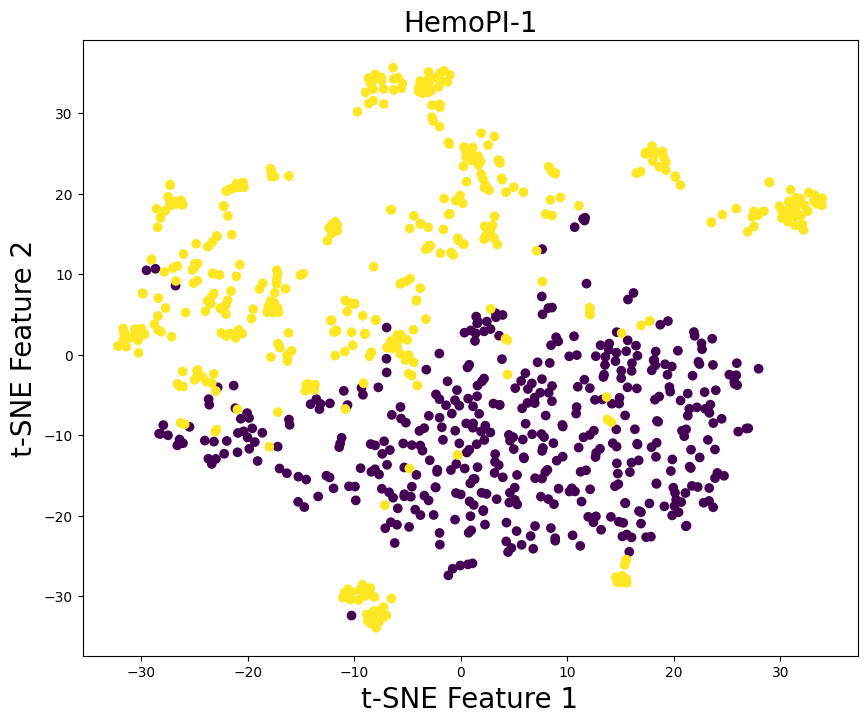

In [17]:
plot_tsne(x_hemo1,y_hemo1,'hemo1','HemoPI-1')

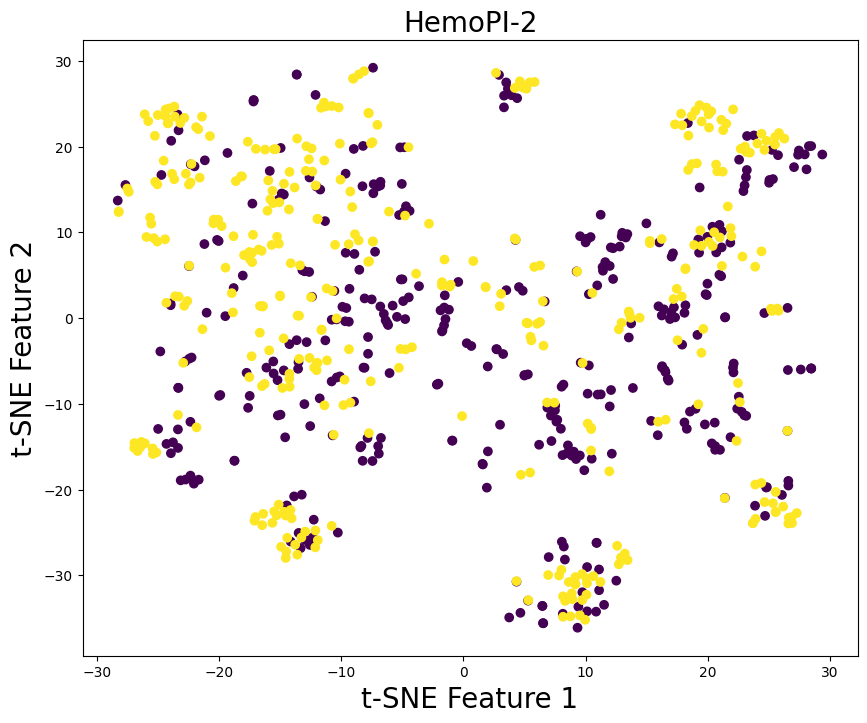

In [35]:
plot_tsne(x_hemo2,y_hemo2,'hemo2','HemoPI-2')

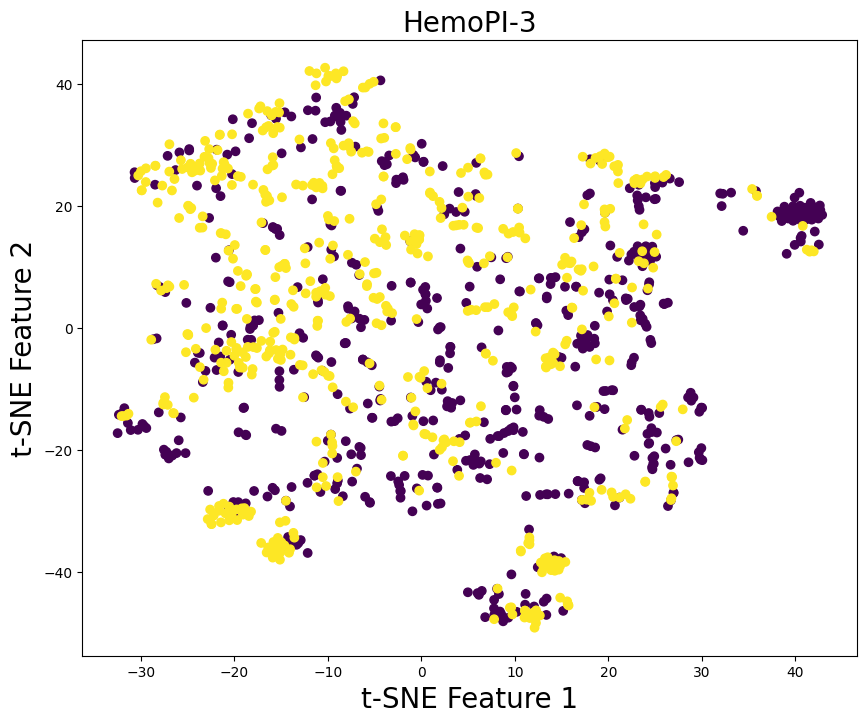

In [36]:
plot_tsne(x_hemo3,y_hemo3,'hemo3','HemoPI-3')